# Regresja Liniowa - Implementacja i wyniki

<!-- -->

<div style="text-align: justify;">
    Do reprezentacji danych elipsometrycznych użyto dwóch klas: training_sample oraz training_dataset. Klasa training_sample opisuje pojedyńczy zestaw danych dotyczący jednej próbki. Zawiera on informacje o wartościach PSI oraz DELTA dla długości fal od 300 do 1000 z krokiem 10nm. Klasa training_dataset opisuje zaś zbiór próbek które można wykorzystać do uczenia modeli. Klasy te zakładają, że dane na temat próbki - tj. grubość, oraz współczynniki A, B, C są zawarte w nazwie pliku, z którego dane są wczytywane, zgodnie ze wzorem opisanym w poprzednim akapicie. W celu zachowania czytelności tekstu oraz przedstawienia działania funkcji znajdujących się w poszczególnych klasach, każda zastosowana funkcja której powstanie było wynikiem tej pracy zostanie przedstawiona przed wywołaniem jej w kodzie. Ze względu na brak natywnego wsparcia Jupyter Notebook dla importowania innych notatników do notatnika obecnie używanego, zastosowano bibliotekę `importnb`, która pozwala na importowanie innych notatników jako modułów Pythona. W celu poprawnego działania należy zainstalować tę bibliotekę, co można zrobić za pomocą polecenia `pip install importnb`. W celu dokonania analizy zbioru danych utworzono instancję klasy training_dataset. Konstruktor klasy training_dataset zamieszono poniżej.
</div>

<!-- -->

In [1]:
def __init__(self, dataset_folder, col):
        self.samples = self.gather_samples(dataset_folder, col)

<!-- -->

<div style="text-align: justify;">
    Jak widać funkcja ta przyjmuje jako argumenty datasets_folder - lokalizację zbioru danych które chcemy poddać analizie - oraz col - listę kolumn które znajdować się będą w pojedyńczej próbce należącej do zbioru danych. Konstruktor wywołuje należącą do tej samej klasy - gather_samples - która z kolei wywołuje funkcję konstruktora klasy training_sample dla każdego z plików tekstowych znajdujących się w folderze wskazanym w jako parametr konstruktora klasy training_dataset. Podczas tworzenia obiektu typu training_sample, dane zawarte w korespondującym do niego pliku zapisywane są w formie zmiennej typu dataframe, a wartości grubości - T - oraz parametrów A, B, C pozyskiwane są z nazwy pliku i zapisywane jako zmienny typu float. Opisywane funkcje zamieszczono poniżej.
</div>

<!-- -->

In [2]:
#funkcja gather_samples z klasy training_dataset
def gather_samples(self, dataset_folder, col):
    all_items = os.listdir(dataset_folder)
    files = [item for item in all_items if os.path.isfile(os.path.join(dataset_folder, item))]
    samples = []
    for i in files:
        sample = training_sample(os.path.join(dataset_folder, i),col)
        samples.append(sample)

    return samples
#konstruktor klasy training_sample
def __init__(self, file_path, col = ['wavelength', 'psi65', 'del65', 'psi70', 'del70', 'psi75', 'del75']):
    # Initialize the training_sample object by decoding the file name to extract parameters
    # and loading the data from the file.
    self.T = self.decode_sample(file_path)[0]
    self.A = self.decode_sample(file_path)[1]
    self.B = self.decode_sample(file_path)[2]
    self.C = self.decode_sample(file_path)[3]
    self.data = self.load_data(file_path, self.T, self.A, self.B, self.C, col)


#funkcja decode_sample z klasy training_sample odpowiada za odczytywanie wartości T, A, B, C z nazwy pliku
def decode_sample(self, filename):
    filename = os.path.basename(filename)
    info = filename.split("_")
    T = info[0]
    A = info[1]
    B = info[2]
    C = info[3]
    C = C.removesuffix(".txt")
    return [T, A, B, C]

#funkcja load_data z klasy training_sample odpowiada za zapisywanie danych odczytanych z treści pliku
#w formie dataframe

def load_data(self, filename, T, A, B, C, col):
    dataHelper = pd.read_csv(filename, sep='\t', header=None, index_col=False)
    dataHelper = dataHelper.drop(index=[0])
    dataHelper = dataHelper.iloc[:, :-1]
    dataHelper.columns = col
    dataHelper['T'] = T
    dataHelper['A'] = A
    dataHelper['B'] = B
    dataHelper['C'] = C
    return dataHelper


<div style="text-align: justify;">
Przed rozpoczęciem pracy konieczne jest zaimportowanie odpowiednich bibliotek i klas. Biblioteka import_ipynb jest wykorzystywana do importowania innych notatników jako modułów Pythona, co pozwala na korzystanie z funkcji i klas zdefiniowanych w tych notatnikach.
Klasa training_dataset zawiera kod opisujący zbiór danych na którym pracowano. Klasa locations pozwala na łatwy dostęp do ścieżek do plików istotnych dla projektu. Biblioteka os pozwala na wykonywanie operacji na ścieżkach do plików.
</div>

In [1]:
import import_ipynb
import training_dataset as td
import locations as l
import os

<div style="text-align: justify;">
    Pozyskujemy ścieżkę do interesującego nas zbioru danych oraz tworzymy obiekt training_dataset na jego podstawie.
</div>

In [2]:
l.locations.list_datasets()

['.ipynb_checkpoints',
 'half_new_Si_jaw_delta',
 'lifesat',
 'new_Si_jaw_delta',
 'quarter_new_Si_jaw_delta',
 'R2_comparison_2.ipynb',
 'si02',
 'Si_jaw',
 'Si_jaw_delta']

In [3]:
datasets_folder = l.locations.get_data_dir()
specific_dataset_location = os.path.join(datasets_folder, "new_Si_jaw_delta")
t_dataset = td.training_dataset(specific_dataset_location, col = ['wavelength', 'psi65', 'del65', 'psi70', 'del70', 'psi75', 'del75'])

<div style="text-align: justify;">
    Za pomocą funkcji plot_data() zawartej w klasie training_dataset możemy zwizualizować dane zawarte w zbiorze danych. Funkcja ta przyjmuje jako argumenty nazwy interesujących nas parametrów. Następnie pobiera one interesujące nas dane z każdej instancji training_sample i prezentuje je w postaci histogramu
</div>

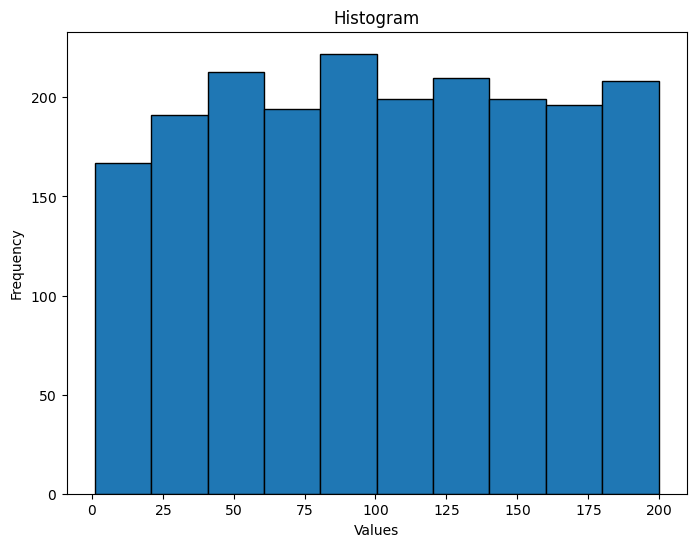

In [6]:
t_dataset.plot_histogram(["T"])

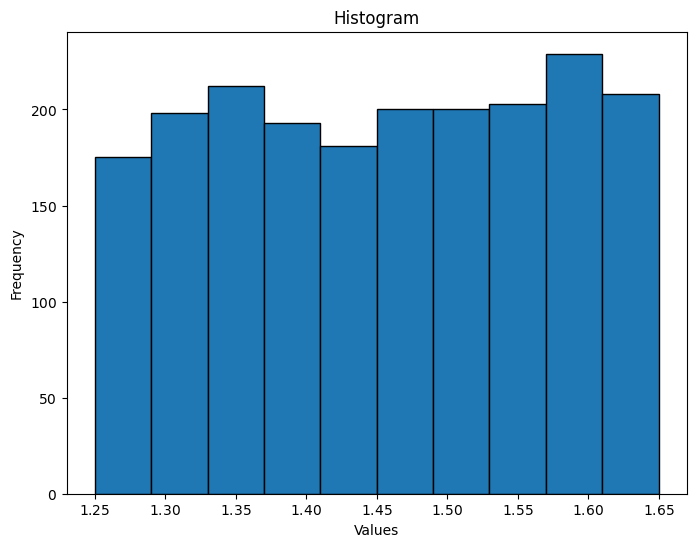

In [7]:
t_dataset.plot_histogram(["A"])

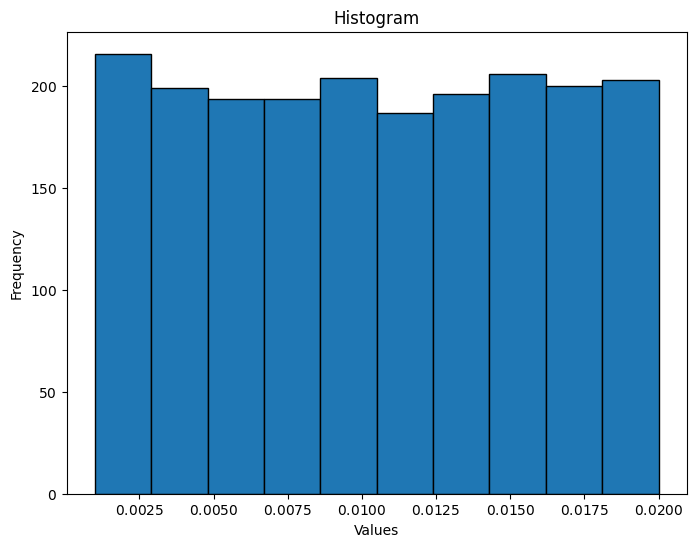

In [8]:
t_dataset.plot_histogram(["B"])

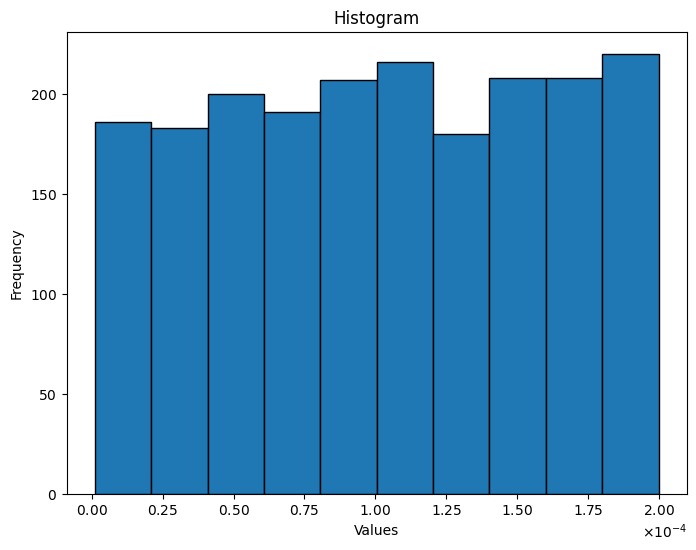

In [9]:
t_dataset.plot_histogram(["C"])

<div style="text-align: justify;">
    Jak widać dane rozłożone są równomiernie, co sprawia że nie jest konieczne zastosowanie algorytmów służących do usuwania odstających wartości. Przystępujemy do analizy danych za pomocą regresji liniowej. Analizy dokonujemy na dwa sposoby - pierwszy sposób polega na analizie poszczególnych wierszy zbioru danych - tj. podstawową jednostką która posłuży do wykonywania inferencji będzie pojedyńczy wiersz należący do próbki. Wiersz ten będzie się składać w długości fali, oraz wartości PSI i DELTA dla trzech różnych kątów padania wiązki. Drugi sposób polega najednoczesnej analizie całej próbki - tj. podstawową jednostką będzie pojedyńcza próbka, która będzie się składać z długości fali oraz wartości PSI i DELTA dla trzech kątów padania. W celu przedstawienia próbki w ten sposób użyto funkcji return_as_flat_df należącej do klasy training_sample oraz funkcji o zbliżonej konstrukcji które zwracają dane innego typu np. zwracają je w formie tensorów bądź listy zmiennych typu float. Funkcję return_as_flat_df przedstawiono poniżej:
</div>

In [10]:
def return_as_flat_df(self, feature_columns = ['wavelength', 'psi65', 'del65', 'psi70', 'del70', 'psi75', 'del75']
                      , target_columns = ['T', 'A', 'B', 'C']):
        features = self.data[feature_columns]
        targets = self.data[target_columns]
        targets = targets.iloc[:1]
        features = features.values.reshape(1, -1)
        targets = targets.values.reshape(1, -1)
        features = pd.DataFrame(features)
        targets = pd.DataFrame(targets)
        return features, targets

<div style="text-align: justify;">
Przyjmuje ona jako argumenty listę kolumn z których wartości będziemy chcieli użyć podczas uczenia jako etykiety oraz listę kolumn z których wartości będziemy chcieli użyć jako cechy. Funkcja ta zwraca dwie ramki danych - pierwsza zawiera cechy, druga etykiety. Wartości w ramkach danych są spłaszczone, co oznacza że każda próbka jest reprezentowana jako pojedynczy wiersz. W obu przypadkach będziemy chcieli przewidzieć grubość warstwy SiO2, oraz współczynniki A, B, C. Regresję liniową przeprowadzimy za pomocą biblioteki scikit-learn, która jest jedną z najpopularniejszych bibliotek do uczenia maszynowego w Pythonie. Po utworzeniu instancji klasy, możemy ją przeprowadzić za pomocą funkcji, lin_reg, flat_lin_reg, lasso_reg, flat_lasso_reg, ridge_reg, flat_ridge_reg. Regresje grzbietowa [ang. "ridge"] i lasso przyjmują jako parametr także wartość alpha. Wartość ta wpływa na funkcję kosztu poprzez penalizację wysokich wartości współczynników regresji, co pozwala na uniknięcie przeuczenia modelu. Wzory na funkcje kosztu regresji lasso oraz grzbietowej przedstawione są poniżej:

</div>

$$
\text{Funkcja kosztu regresji lasso: } \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$$

$$
\text{Funkcja kosztu regresji grzbietowej: } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2
$$

<div style="text-align: justify;">
Funkcję przeprowadzającą regresję typu lasso dla próbek przedstawionych jako pojedyńcze wiersze przedstawiono poniżej.
</div>

In [11]:
    def flat_lasso_reg(self, feature_columns=['wavelength', 'psi65', 'del65', 'psi70', 'del70', 'psi75', 'del75'], target_columns=['T'], test_size=0.2, random_state = 42, alpha = 0.1):
        # Split the dataset into training and testing sets
        data = self.flat_df_split(feature_columns, target_columns, test_size, random_state)
        
        # Initialize Lasso regression model
        lasso_reg = Lasso(alpha=alpha)
        
        # Fit the Lasso regression model on the training data
        lasso_reg.fit(data[0], data[2])
        
        # Predict on train and test sets
        pred_train = lasso_reg.predict(data[0])
        pred_test = lasso_reg.predict(data[1])
        
        # Calculate R² coefficients
        r2_train = r2_score(data[2], pred_train)
        r2_test = r2_score(data[3], pred_test)
        
        # Print R² coefficients
        print(f"Train R²: {r2_train}")
        print(f"Test R²: {r2_test}")
        
        # Return R² coefficients as a dictionary
        return {"train_r2": r2_train, "test_r2": r2_test, "coefficients": lasso_reg.coeff_}

<div style="text-align: justify; line-height: 1.5;">
Funkcja ta przyjmuje jako argument listę kolumn z których wartości będziemy chcieli użyć podczas uczenia jako cechy, listę kolumn z których wartości będziemy chcieli użyć jako etykiety, rozmiar zbioru testowego, wartość random_state oraz wartość alpha. Funkcja ta dzieli zbiór danych na zbiór treningowy i testowy, następnie tworzy model regresji lasso, uczy go na zbiorze treningowym i dokonuje predykcji na zbiorze treningowym i testowym. Na końcu funkcja ta zwraca współczynnik determinacji R² dla zbioru treningowego i testowego oraz współczynniki regresji. Poniżej zamieszczono tabele zawierające wyniki różnych rodzajów regresji dla wybranych wartości alpha oraz dla różnych wartości poszukiwanych. Przedstawiono jako OLS - ordinary least square. Regresja przeprowadzaną na próbkach spłaszczonych została opisana jako "flat".
</div>

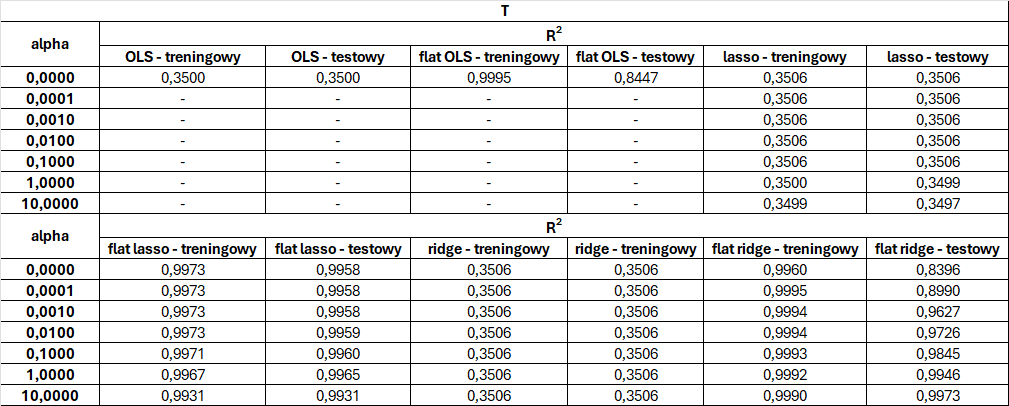

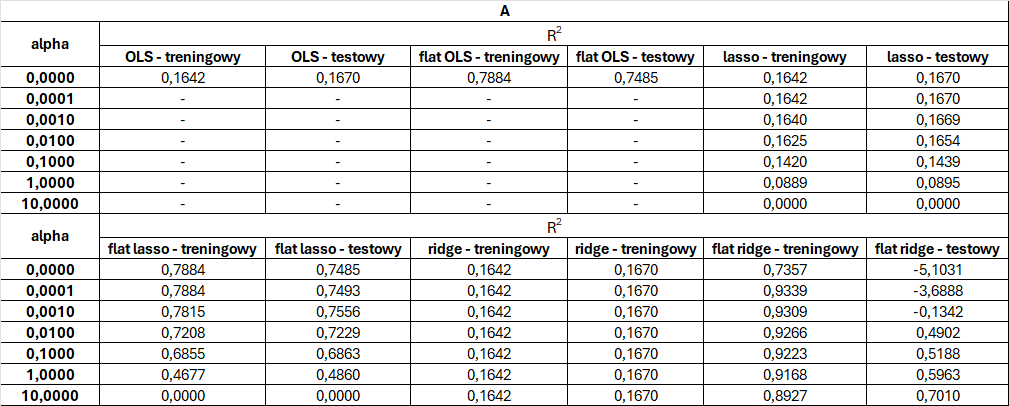

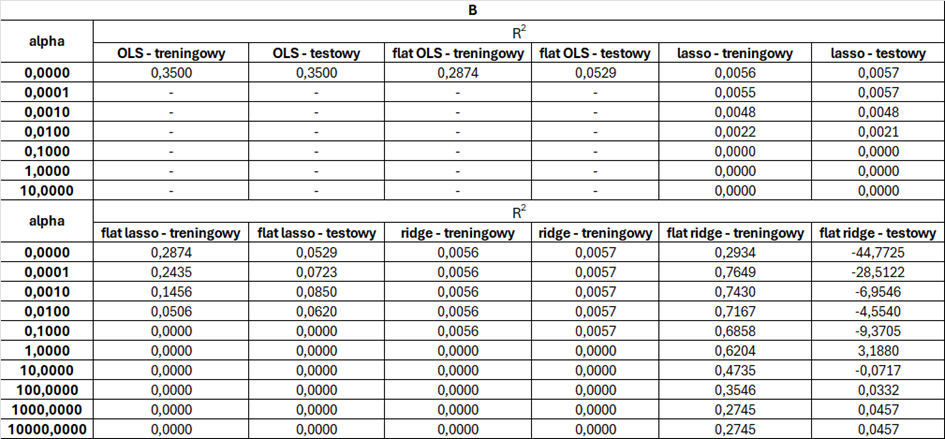

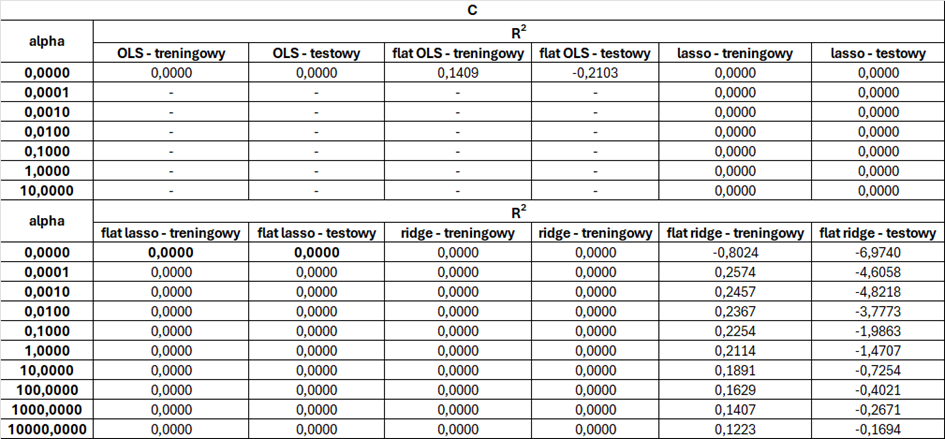

<div style="text-align: justify; line-height: 1.5;">
Ostatecznie, wyniki uzyskane za pomocą regresji uznano za niezadowalające. Dobre wyniki uzyskano jedynie przy wyznaczaniu wartości grubości za pomocą próbek spłaszczonych. Współczynnik determinacji dla wyników uzyskanych za pomocą tej metody był zbliżony do 0,99 zarówno dla regresji grzbietowej jak i dla regresji typu lasso. Wyniki uzyskiwane dla przewidywań dokonywanych za pomocą pojedyńczych wierszy były słabe w każdym przypadku. Najlepsze wyniki dla tej motody uzyskano przy przewidywaniu grubości - współczynnik determinacji dla tych wyników wynosił w przybliżeniu 0,35. Pewną liniową zależność można było zauważyć także podczas przewidywania współczynnika A, jednak współczynnik determinacji dla tych wyników wynosił około 0,1. W przypadku przewidywania współczynników B i C uzyskano wyniki bliskie zeru. Wartym zauważenia wydaje się być fakt, że najlepiej z przewidywaniami zdaje się radzić sobie regresja liniowa grzbietowa z dużymi wielkościami współczynnika alpha. Może to wskazywać na fakt, że w celu przewidzenia wielkości A i B z odpowiednią dokładnością, konieczne jest kierowanie sie szerokim zakresem danych o niewielkim, aczkolwiek niezerowym stopniu ważności. Poniżej zamieszczono wykresy rozproszenia dla regresji, które uzyskały najlepsze rezultaty dla każdej z poszukiwanych wartości z wyjątkiem C, jako że dla tej wartości najlepszy uzyskany współczynnik korelacji dla zbioru testowego miał wartość ujemną, co oznacza że model został przeuczony na tyle silnie, że zależność między wartościami była odwrotna niż oczekiwana. 



    
</div>

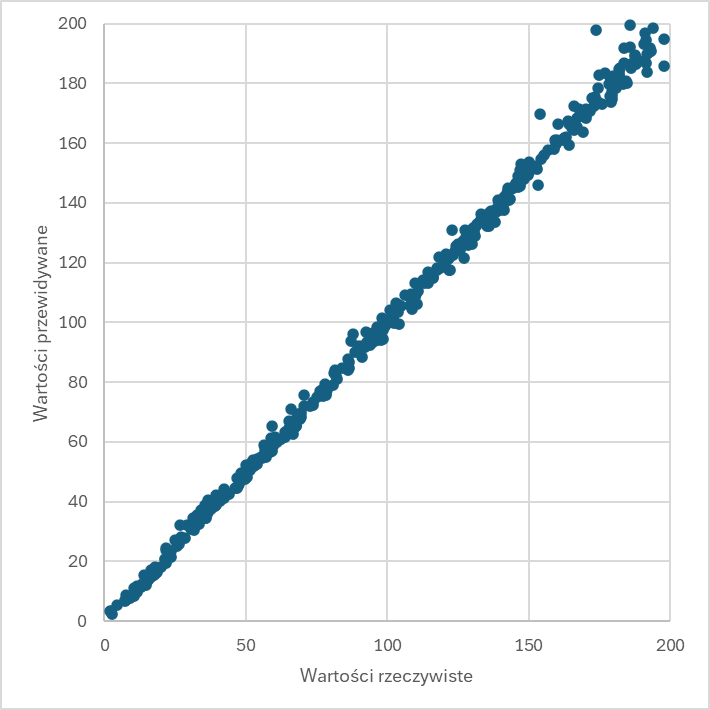

Zależność wartości rzeczywistych od wartości przewidywanych dla grubości T.

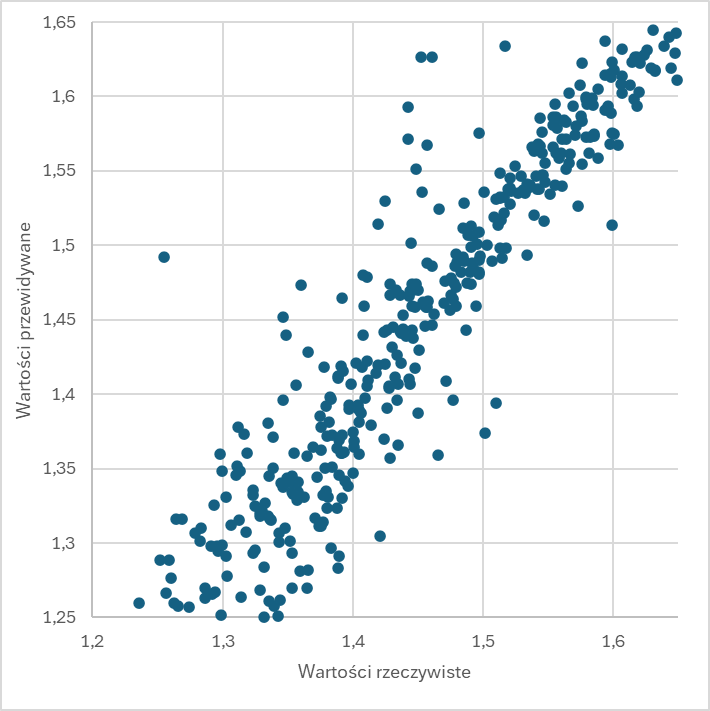

Zależność wartości rzeczywistych od wartości przewidywanych dla współczynnika A.

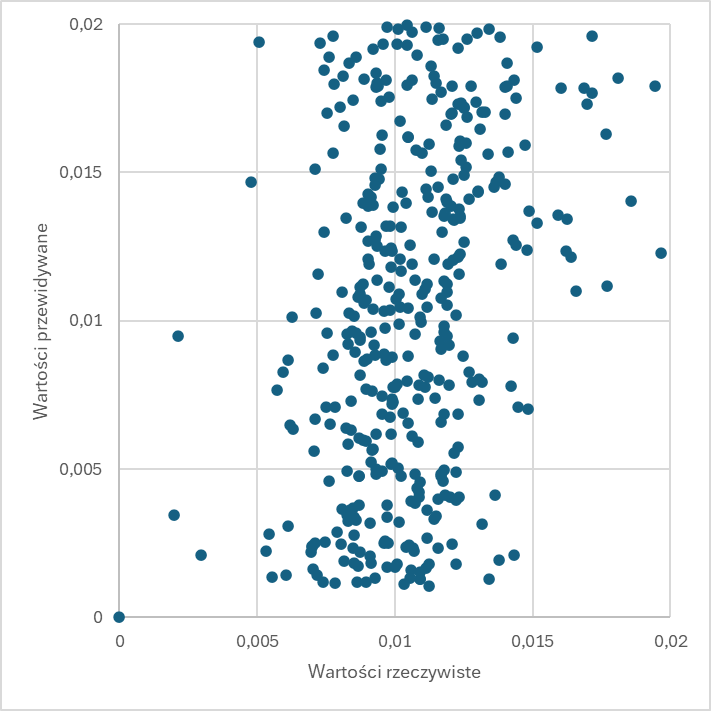

Zależność wartości rzeczywistych od wartości przewidywanych dla współczynnika B.

<div style="text-align: justify; line-height: 1.5;">
Wyniki uzyskane za pomocą różnych wariantów regresji liniowej uznano za niedostateczne. Być może zastosowanie innych wariacji regresji tj. regresja wielomianowa, pozwoliłoby na uzyskanie lepszych wyników. Na potrzeby realizacji tej pracy jednak, zdecydowano się na zastosowanie sieci neuronowych, które pozwalają na modelowanie bardziej złożonych zależności. W kolejnej sekcji przedstawiono implementację sieci neuronowych oraz wyniki uzyskane za ich pomocą.



    
</div>

# Sieci Neuronowe - Implementacja i wyniki

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
    
W niniejszej pracy zdecydowano się na wykorzystanie biblioteki PyTorch jako głównego narzędzia do implementacji i trenowania sieci neuronowych. PyTorch jest otwartoźródłowym frameworkiem rozwijanym przez Facebook AI Research, który zyskał dużą popularność w środowisku naukowym i przemysłowym ze względu na swoją elastyczność oraz intuicyjność. Cechy te umożliwiają łatwe prototypowanie i modyfikowanie modeli, co jest szczególnie istotne w kontekście badań eksperymentalnych, gdzie często konieczne jest testowanie różnych architektur i podejść. Pytorch zapewnia także wsparcie dla akceleracji obliczeń z użyciem GPU za pomocą CUDA. Z racji na to, że karta graficzna używana do trenowania modeli jest kartą RADEON, w celu uzyskania odpowiedniego oprogramowania należało przeprowadzić szkolenie na systemie operacyjnym Linux, gdzie zainstalowano sterowniki AMD ROCm. W celu przeprowadzenia szkolenia na systemie Windows należałoby skorzystać z oprogramowania AMD ROCm for Windows, które jest wciąż w fazie rozwoju i nie jest jeszcze w pełni stabilne. W niniejszej pracy zdecydowano się na wykorzystanie PyTorch w wersji 2.0.1, która jest najnowszą stabilną wersją dostępną w momencie pisania tej pracy. W celu obsługi i zarządzania budową sieci neuronowej oraz przebiegiem procesu trenowania utworzono dwie klasy - klasę MLP opisaną w notatniku model_creator oraz klasę train_model opisaną w notatniku model_training. Z wykorzystaniem tych klas utworzono odpowiednie funkcje zawarte w klasie training_dataset. Pytorch oferuje dużą swobodę w doborze sposobu konstrukcji sieci neuronowej oraz w sposobie przeprowadzania jej szkolenia. Z racji tego, klasy MLP oraz model_training zostaną omówione poniżej.

    
</div>

### Klasa MLP - Implementacja sieci neuronowej

<!-- -->

Struktura klasy MLP z wyłączeniem przynależących do niej funkcji statycznych została przedstawiona poniżej:

<!-- -->

In [ ]:
import os
import torch
import import_ipynb
import torch.nn as nn
import locations as l

class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, activation_fn=nn.LeakyReLU):

        super(MLP, self).__init__()
        if len(hidden_layers) > 7:
            raise ValueError("The number of hidden layers cannot exceed 7.")

        self.layers = nn.ModuleList()
        prev_size = input_size

        # Create hidden layers
        for neurons in hidden_layers:
            self.layers.append(nn.Linear(prev_size, neurons))
            self.layers.append(activation_fn())  # Add the specified activation function
            prev_size = neurons

        # Create output layer
        self.layers.append(nn.Linear(prev_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
    
Klasa ta dziedziczy po "nn.Module", co jest standardową praktyką w PyTorch do definiowania modeli sieci neuronowych. Konstruktor klasy przyjmuje następujące argumenty:

    
</div>

- input_size: liczba cech wejściowych, które będą podawane do sieci neuronowej. W przypadku analizy opartej na poszczególnych wierszach pochodzących z próbek, będzie ona przyjmować wartość 7. Cechami wtedy będą długość fali oraz wartości PSI i DELTA dla trzech kątów padania wiązki. W przypadku analizy opartej na próbkach spłaszczonych, będzie ona przyjmować wartość 497, ponieważ każda próbka będzie zawierać 7 cech dla każdej z trzech kątów padania wiązki dla 71 długości fali (7 * 71 = 497).

- output_size: liczba wartości, które chcemy przewidzieć. W przypadku przewidywania poszczególnych etykiet, będzie to liczba 1, ponieważ przewidujemy tylko jedną wartość - grubość, bądź jeden z parametrów A,B,C. Istnieje też możliwośc przewidywania większej ilości parametrów jednocześnie - wtedy output_size będzie przyjmowac wartość równą liczbie przewidywanych parametrów.

- hidden_layers: lista liczb całkowitych określających liczbę neuronów w każdej warstwie ukrytej. Maksymalna liczba warstw ukrytych wynosi 7, co jest ograniczeniem narzuconym przez konstruktor klasy. Każda warstwa może zawierać w sobie dowolną liczbę neuronów.

-  activation_fn: funkcja aktywacji, która będzie stosowana w warstwach ukrytych. Domyślnie jest to LeakyReLU, ale można użyć dowolnej innej funkcji aktywacji dostępnej w PyTorch, np. ReLU, Sigmoid, Tanh itp. LeakyReLU jest funkcją aktywacji, która jest podobna do ReLU, ale pozwala na przepływ niewielkiej ilości sygnału dla wartości ujemnych, co może pomóc w uniknięciu problemu "zanikającego gradientu".


<div style="text-align: justify; line-height: 1.5;">
    
Funkcja forward jest odpowiedzialna za propagację w przód sieci neuronowej. Przechodzi przez wszystkie warstwy zdefiniowane w konstruktorze i zwraca wynik końcowy. Klasa ta pozwala na łatwe tworzenie sieci neuronowych o różnych architekturach poprzez modyfikację liczby warstw ukrytych oraz liczby neuronów w każdej z nich. Dzięki zastosowaniu "nn.ModuleList" możliwe jest dynamiczne dodawanie warstw do modelu, co czyni tę klasę elastyczną i łatwą w użyciu.
    
</div>


<!-- -->

### Klasa model_training - Implementacja procesu trenowania modelu

<!-- -->

Z racji na obszerność klasy model_training w pracy zostanie umieszczona wyłącznie jej część umożliwiająca szkolenie bez użycia partii.

<!-- -->

In [5]:
import os
import import_ipynb
import matplotlib.pyplot as plt
import time
import torch
import IPython
from IPython.core.display_functions import clear_output
import locations as l


def train_model(model, loss_fn, optimizer, x_train, y_train, x_test, y_test, model_name, batch_size=0):
    
    os.environ['TERM'] = 'xterm'
    best_loss = float('inf')


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    
    model = model.to(device)

    model_folder = l.locations.get_models_dir()
    save_path = os.path.join(model_folder, model_name)
    
    x_train, y_train = x_train.to(device), y_train.to(device)
    x_test, y_test = x_test.to(device), y_test.to(device)

    def r2_loss(y_pred, y_true):
        ss_total = torch.sum((y_true - torch.mean(y_true)) ** 2)
        ss_residual = torch.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return 1 - r2  # Loss is 1 - R²

        while True:
            IPython.display.clear_output(wait=True)
            # Forward pass
            model.train()
            outputs = model(x_train)
            loss = loss_fn(outputs, y_train)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            model.eval()
            with torch.no_grad():
                test_pred = model(x_test)
                test_loss = loss_fn(test_pred, y_test)
                r2_test_loss = r2_loss(test_pred, y_test)

            if loss.detach().item() < best_loss:
                best_loss = loss.item()
                torch.save(model.state_dict(), save_path)
                print(f"New best loss: {best_loss:.4f}. Model saved to {save_path}.")

            print(f"Current Loss: {loss.item():.8f}, Test Loss: {test_loss.item():.8f}")
            print(f"Current R2 Loss: {r2_loss(outputs, y_train).item():.8f}, Test R2 Loss: {r2_test_loss:.8f}")

<!-- -->

Klasa ta przyjmuje następujące argumenty:

-  model: instancja klasy MLP, która będzie trenowana. Model ten powinien być zdefiniowany wcześniej i zawierać odpowiednią architekturę sieci neuronowej.

-  loss_fn: funkcja straty, która będzie używana do oceny jakości modelu. Może to być np. Mean Squared Error (MSE) lub inna funkcja straty odpowiednia dla problemu regresji.

-  optimizer: optymalizator, który będzie używany do aktualizacji wag modelu. Może to być np. Adam, SGD lub inny optymalizator dostępny w PyTorch.

-   x_train, y_train: dane treningowe, które będą używane do trenowania modelu. x_train to tensor zawierający cechy wejściowe, a y_train to tensor zawierający etykiety (wartości docelowe).

-   x_test, y_test: dane testowe, które będą używane do oceny modelu po każdej epoce treningu. x_test to tensor zawierający cechy wejściowe dla danych testowych, a y_test to tensor zawierający etykiety (wartości docelowe) dla danych testowych.

-   model_name: nazwa modelu, która będzie używana do zapisania wytrenowanego modelu.

-   batch_size: rozmiar partii, który będzie używany podczas trenowania modelu. Jeśli batch_size jest równy 0, model będzie trenowany na całych danych treningowych bez podziału na partie. Jeśli batch_size jest większy od 0, dane treningowe zostaną podzielone na partie o określonym rozmiarze.


Klasa ta umożliwia szkolenie modelu zarówno za pomocą procesora (ang. CPU), jak i akceleratora graficznego (ang. GPU). W przypadku dostępności GPU, model zostanie przeniesiony na urządzenie GPU, co przyspieszy proces trenowania. Funkcja ta zapisuje najlepszy model na podstawie wartości funkcji straty, co pozwala na zachowanie najlepszego modelu uzyskanego podczas treningu. Funkcja ta jest elastyczna i może być dostosowana do różnych architektur sieci neuronowych oraz różnych problemów regresyjnych. Daje ona również możliwość monitorowania procesu trenowania poprzez wyświetlanie aktualnej wartości funkcji straty oraz współczynnika determinacji R². Proces trenowania jest realizowany w pętli, która kontynuuje się do momentu przerwania przez użytkownika. W każdej iteracji pętli model jest trenowany na danych treningowych, a następnie oceniany na danych testowych. Jeśli wartość funkcji straty dla modelu na danych treningowych jest mniejsza niż dotychczasowa najlepsza wartość, model jest zapisywany na dysku. Bieżące wyświetlane są wartości funkcji straty oraz współczynnika determinacji R² dla danych treningowych i testowych, pozwala na oszacowanie właściwego momentu przerwania procesu trenowania. Predykcje dokonywane w celu oszacowania błędu na zbiorze testowym są dokonywane przy użyciu torch.no_grad(), co oznacza że nie są one uwzględniane w obliczeniach gradientu, co przyspiesza proces trenowania i zmniejsza zużycie pamięci. Sprawia to również, że model nie uczy się na zbiorze testowym, co jest zgodne z zasadami uczenia maszynowego. 


Funkcje odpowiedzialne za trenowanie modelu na danym zestawie danych zostały umieszczone w klasie training_dataset. Funkcje te - funkcja train(), flat_train() oraz ich wariacje - przyjmują jako argumenty listę kolumn z których wartości będziemy chcieli użyć podczas uczenia jako cechy oraz listę kolumn z których wartości będziemy chcieli użyć jako etykiety. Przyjmują one także jako argumenty funkcję używaną do obliczenia strat oraz tabelę opisukącą liczbę neuronów znajdujących się w poszczególnych warstwach. Z racji na fakt że podczas przeprowadzania badań użyto wielu architektur sieci neuronowych, przyjęto konwencję co do nazewnictwa modeli. W celu sprawnego generowania nazw modeli które zawierają informacje o architekturze sieci neuronowej, oraz o danych użytych podczas szkolenia utworzono funkcję generate_model_name. Funkcja te została przedstawiona poniżej:






<!-- -->

In [6]:
    def generate_model_name(self,feature_columns, target_columns, is_standardized, hidden_layers, prefix="model"):
        # Join feature and target column names
        features_part = "_".join(feature_columns)
        targets_part = "_".join(target_columns)
        
        # Add standardization information
        standardization_part = "standardized" if is_standardized else "non_standardized"
        
        # Add hidden layer information
        hidden_layers_part = "_".join(map(str, hidden_layers))
        
        # Combine all parts into the model name
        model_name = f"{prefix}_{features_part}_to_{targets_part}_{standardization_part}_layers_{hidden_layers_part}.pth"
        return model_name

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
Funkcja ta jest wywoływana wewnątrz metod odpowiedzialnych za trenowanie modeli zawartych w klasie training_dataset. Przyjmuje ona jako argumenty listę kolumn z których wartości będziemy chcieli użyć podczas uczenia jako cechy, listę kolumn z których wartości będziemy chcieli użyć jako etykiety, informację o tym czy dane zostały znormalizowane, oraz listę liczb całkowitych określających liczbę neuronów w każdej warstwie ukrytej. Funkcja ta zwraca nazwę modelu, zawierającą informacje na temat architektury sieci neuronowej oraz danych użytych podczas szkolenia. Nazwa modelu jest tworzona w formacie "model_{features}_to_{targets}_{standardization}_layers_{hidden_layers}.pth", gdzie {features} to nazwy cech wejściowych, {targets} to nazwy etykiet, {standardization} to informacja o tym czy dane zostały znormalizowane, a {hidden_layers} to liczba neuronów w poszczególnych warstwach ukrytych. Funkcja ta pozwala na łatwe generowanie nazw modeli, które są czytelne i zawierają istotne informacje na temat modelu. Na przykład nazwa modelu "model_wavelength_psi65_del65_psi70_del70_psi75_del75_to_A_non_standardized_layers_64_32_16" oznacza model, który przewiduje wartość A na podstawie cech wejściowych takich jak długość fali oraz wartości PSI i DELTA dla trzech kątów padania wiązki. Dane użyte przy szkoleniu tego modelu nie były standaryzowane. Model taki składa się z trzech warstw ukrytych, z których pierwsza zawiera 64 neurony, druga 32 neurony, a trzecia 16 neuronów. Modele które były trenowane z użyciem spłaszczonych próbek zawierają w nazwie modelu dodatkowy przedrostek "flat", co pozwala na łatwe odróżnienie ich od modeli trenowanych na pojedynczych wierszach. Przykładowa nazwa takiego modelu to "flat_model_wavelength_psi65_del65_psi70_del70_psi75_del75_to_A_non_standardized_layers_64_32_16.pth". W celu oceny jakości modeli trenowanych z użyciem pojedyńczych wierszy utworzono funkcje takie jak get_median_r2_score i get_mean_r2_score. Obliczają one one medianę i średnią współczynnika determinacji R² dla przewidywań dokonywanych na wszystkich wierszach zawartych w danej próbce. Następnie obliczają one wartości R² dla wszystkich próbek zawartych w zbiorze danych. W celu oceny jakości modeli trenowanych z użyciem spłaszczonych próbek utworzono funkcje takie jak flat_test_r2. Funkcja ta dokonuje przewidywań na wszystkich próbkach zawartych w zbiorze danych, a następnie oblicza na ich podstawie współczynniki determinacji R².
</div>

### Sieci neuronowe - rezultaty

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
Jak wspomniano w powyższym podpunkcie, sieci trenowano zarówno z wykorzystaniem poszczególnych wierszy jak i spłaszczonych próbek. W obu przypadkach stosowano różne architektury sieci neuronowych, jednak w przypadku szkolenia opartego na poszczególnych wierszach wyniki były dużo gorsze. Podczas szkolenia za pomocą spłaszczonych próbek, przetestowano również podejście w którym poszukiwano wszystkich czterech parametrów jednocześnie. Dla obu podejść przetestowano sieci o różnej liczbie warstw ukrytych oraz różnej liczbie neuronów w poszczególnych warstwach. W celu uzyskania miarodajnego porównania jakości poszczególnych sieci w tej pracy zdecydowano się na umieszczenie wyników tylko ich poszczególnych wersji. Pierwsze podjęte próby dotyczyło możliwości przewidywania wartości poszukiwanych parametrów na podstawie pojedynczych wierszy. W tym celu wyszkolono modele o architekturach 7x64x32x16x1, 7x32x16x8x1 oraz 7x16x8x4x1. Zarówno wartości cech jak i wartości etykiet nie poddawano skalowaniu. Wszystkie modele trenowano przez okres jednej godziny, w celu uzyskania miarodajnego porównania. Jako funkcji strat użyto błędu średniokwadratowego, a zastosowanym optymizatorem był Adam. Podczas wielokrotnego powtarzania procesu uczenia zauważono, że uczenie przynosi lepsze rezultaty w przypadkach, gdy zastosowana prędkość uczenia jest niska. W celu miarodajnego porównania dla wszystkich wyuczonych modeli zastosowano prędkość uczenia równą 0,00001. Tabelę zawierającą współczynniki korelacji uzyskane dla zbiorów treningowych, testowych oraz dla zbiorów połączonych zamieszczono w tabeli poniżej:
</div>

<!-- -->

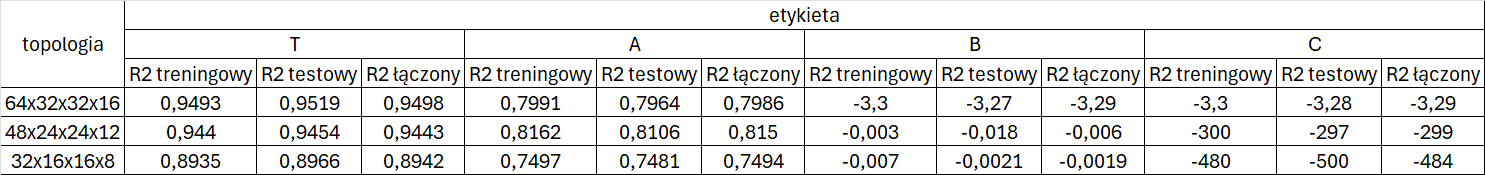

<!-- -->

Powyższe wyniki dla trzech różnych topologii sieci (64×32×32×16, 48×24×24×12, 32×16×16×8) wyraźnie pokazują, że modele o takiej samej architekturze radzą sobie bardzo dobrze z predykcją etykiety T, nieco gorzej z A, a praktycznie nie uczą się etykiet B i C. Dla T wartości współczynnika determinacji zarówno na zbiorze treningowym, jak i testowym utrzymują się na poziomie ok. 0,89–0,95, przy czym różnice między wartościami treningowymi i testowymi są minimalne, co świadczy o braku przeuczenia i stabilnej zdolności generalizacji. W przypadku etykiety A R² wynosi ok. 0,75–0,82, co wskazuje na umiarkowanie dobrą jakość dopasowania; ponownie niewielka różnica między R²_treningowym i R²_testowym sugeruje, że model nie ulega znacznemu przeuczeniu. Natomiast dla etykiet B oraz C wszystkie topologie osiągają wartości R² dalece ujemne (od około –3 w najszerszej sieci do nawet –480 w najmniejszej), zarówno na zbiorze treningowym, jak i testowym, co oznacza, że zachowanie modelu jest gorsze niż prosty model średniej. Dla B i C nie widać znaczącej poprawy topologiami, co świadczy o całkowitym niedouczeniu – sieć nie jest w stanie uchwycić żadnych zależności pomiędzy cechami a tymi etykietami. Można zatem wnioskować, że przewidywanie T i A wykorzystuje informacje zawarte w danych skutecznie, podczas gdy B i C wymagają albo zupełnie innego podejścia (np. modelu sekwencyjnego lub uwzględnienia dodatkowych cech), albo wskazują na istotnie niższą jakość lub brak wyjaśnialnych wzorców w danych dla tych etykiet. Jako jedną z możliwych przyczyn takiego stanu rzeczy rozważano fakt, że parametry B oraz C przyjmują niewielkie wartości. Może to powodować zaistnienie tzw. "problemu zanikającego gradientu", który jest częstym problemem w sieciach neuronowych, zwłaszcza gdy wartości etykiet są bardzo małe. W celu sprawdzenia tej hipotezy, przeprowadzono eksperyment polegający na skalowaniu wartości etykiet za pomocą StandardScaler zawartego w bibliotece scikit-learn. Skalowanie to polega na przekształceniu wartości etykiet tak, aby miały średnią równą 0 i odchylenie standardowe równe 1. Skalowaniu podlegały zarówno wartości etykiet jak i wartości cech. Użyte w tym celu scalery zapisano w folderze "scalers" znajdującym się w folderze z code_data_models. Czyności te wykonano tylko w celu zdiagnozowania możliwego problemu. W przypadku chęci zastosowania podobnego narzędzia w przyszłości, preferowanym rozwiązaniem byłoby zastosowanie scalera, który nie zmienia wartości etykiet, a jedynie przekształca je w taki sposób, aby były bardziej zrozumiałe dla modelu. Kolejnymi rozważanymi powodami uzyskiwania tak słabych wyników były niedostateczny rozmiar zbioru danych. W celu przetestowania tych hipotez jednocześnie, powtórzono proces szkolenia dla zbiorów przeskalowanych danych o różnych wielkościach. Wyniki przedstawiono poniżej.

Jak możemy zauważyć, choć wyniki dla parametrów B i C są lepsze, to wciąż są dalekie od zadowalających. Przed przejściem do szkolenia sieci neuronowych za pomocą spłaszczonych próbek, postanowiono przetestować jeszcze jedną możliwą hipotezę. Przyczyną złych wyników uzyskiwanych przez modele mógł być niedostatecznie duży rozmiar zbioru danych. W celu sprawdzenia tej hipotezy, przeprowadzono eksperyment polegający na zmniejszeniu liczby próbek w zbiorze danych do 1000 i do 500. Proces szkolenia przeprowadzono ponownie na tych zbiorach danych ograniczając się do parametrów B i C. Wyniki szkolenia przedstawiono poniżej. Podcza przeprowadzania procesu uczenia na danych skalowanych, zauważono także pojawienie się różnicy pomiędzy wynikami dla zbiorów testowych i treningowych. Z tego powody wśród przedstawionych danych umieszczono także wykres ukazujący zależność różnicy między współczynnikiem determinacji R² dla zbioru testowego i treningowego od liczby próbek w zbiorze danych.

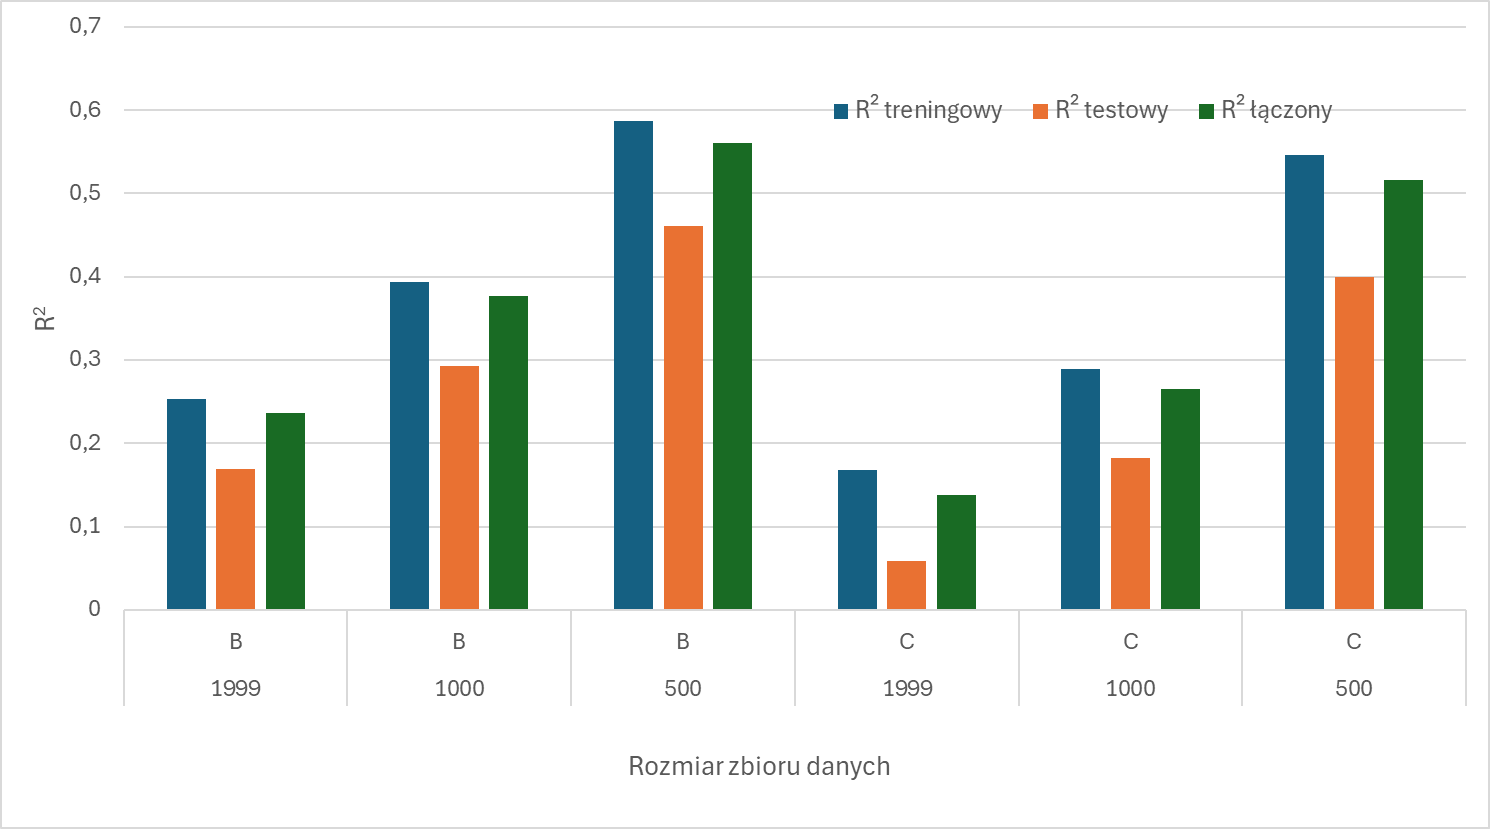